<img src="https://www.usna.edu/WRC/_files/WRClogos/WRCE-logo-combined-01-crop.png" width="200px">

# Alien Invasion (Chapter 13)

Create a seperate file in your alien invasion game for each of the following questions. Paste the content of the file into a Jupyter Notebook cell along with a screen shot of the game (2 cells per answer)

**13-1. Stars:** Find an image of a star. Make a grid of stars appear on the screen.

In [2]:
# code
import pygame
from pygame.sprite import Sprite

class Star(Sprite):
    def __init__(self, ai_game):
        #initialize star and starting position
        super().__init__()
        self.screen = ai_game.screen

        #load star image and set its rect attribute
        self.image = pygame.image.load('images/star.png')
        self.rect = self.image.get_rect()

        #start each new star at top left of screen
        self.rect.x = self.rect.width
        self.rect.y = self.rect.height

        #store star's decimal horizontal position
        self.x = float(self.rect.x)


import sys
import pygame

from settings import Settings
from star import Star

class StarGrid:

    def __init__(self):
        pygame.init()
        self.settings = Settings()
        self.screen = pygame.display.set_mode((0,0), pygame.FULLSCREEN)
        self.settings.screen_width = self.screen.get_rect().width
        self.settings.screen_height = self.screen.get_rect().height

        pygame.display.set_caption("Star Grid")

        self.stars = pygame.sprite.Group()

        self._create_fleet()

    def run_game(self):
        while True:
            self._update_screen()
            self._check_events()

    def _check_events(self):
        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_q:
                    sys.exit()

    def _create_fleet(self):
        #make star
        star = Star(self)
        star_width, star_height = star.rect.size
        #available space in x is width of screen minus the blank margins on either edge which is the width of one star
        available_space_x = self.settings.screen_width - (2*star_width)
        #each star has its own width plus the blank space to its right which is also the width of a star
        #number of stars that will fit in the width of the screen
        number_stars_x = available_space_x // (2*star_width)

        #find number of rows of stars that fit on screen
        available_space_y = self.settings.screen_height  #subtract one star???
        number_rows = available_space_y // (2*star_height)

        for row_number in range(number_rows):
            for star_number in range(number_stars_x):
                self._create_star(star_number, row_number)

    def _create_star(self, star_number, row_number):
        #create row of stars
        star = Star(self)
        star_width, star_height = star.rect.size
        #x and y position of star
        star.rect.x = star_width + 2*star_width*star_number
        star.rect.y = star_height + 2*star_height*row_number
        self.stars.add(star)

    def _update_screen(self):
        # redraw screen during each pass through the loop
        self.screen.fill(self.settings.bg_color)

        self.stars.draw(self.screen)
        # make most recently drawn screen visible
        pygame.display.flip()

if __name__=='__main__':
    #make a game instance from class AlienInvasion and run game
    ai = StarGrid()
    ai.run_game()
    
    
    
    

screen shot
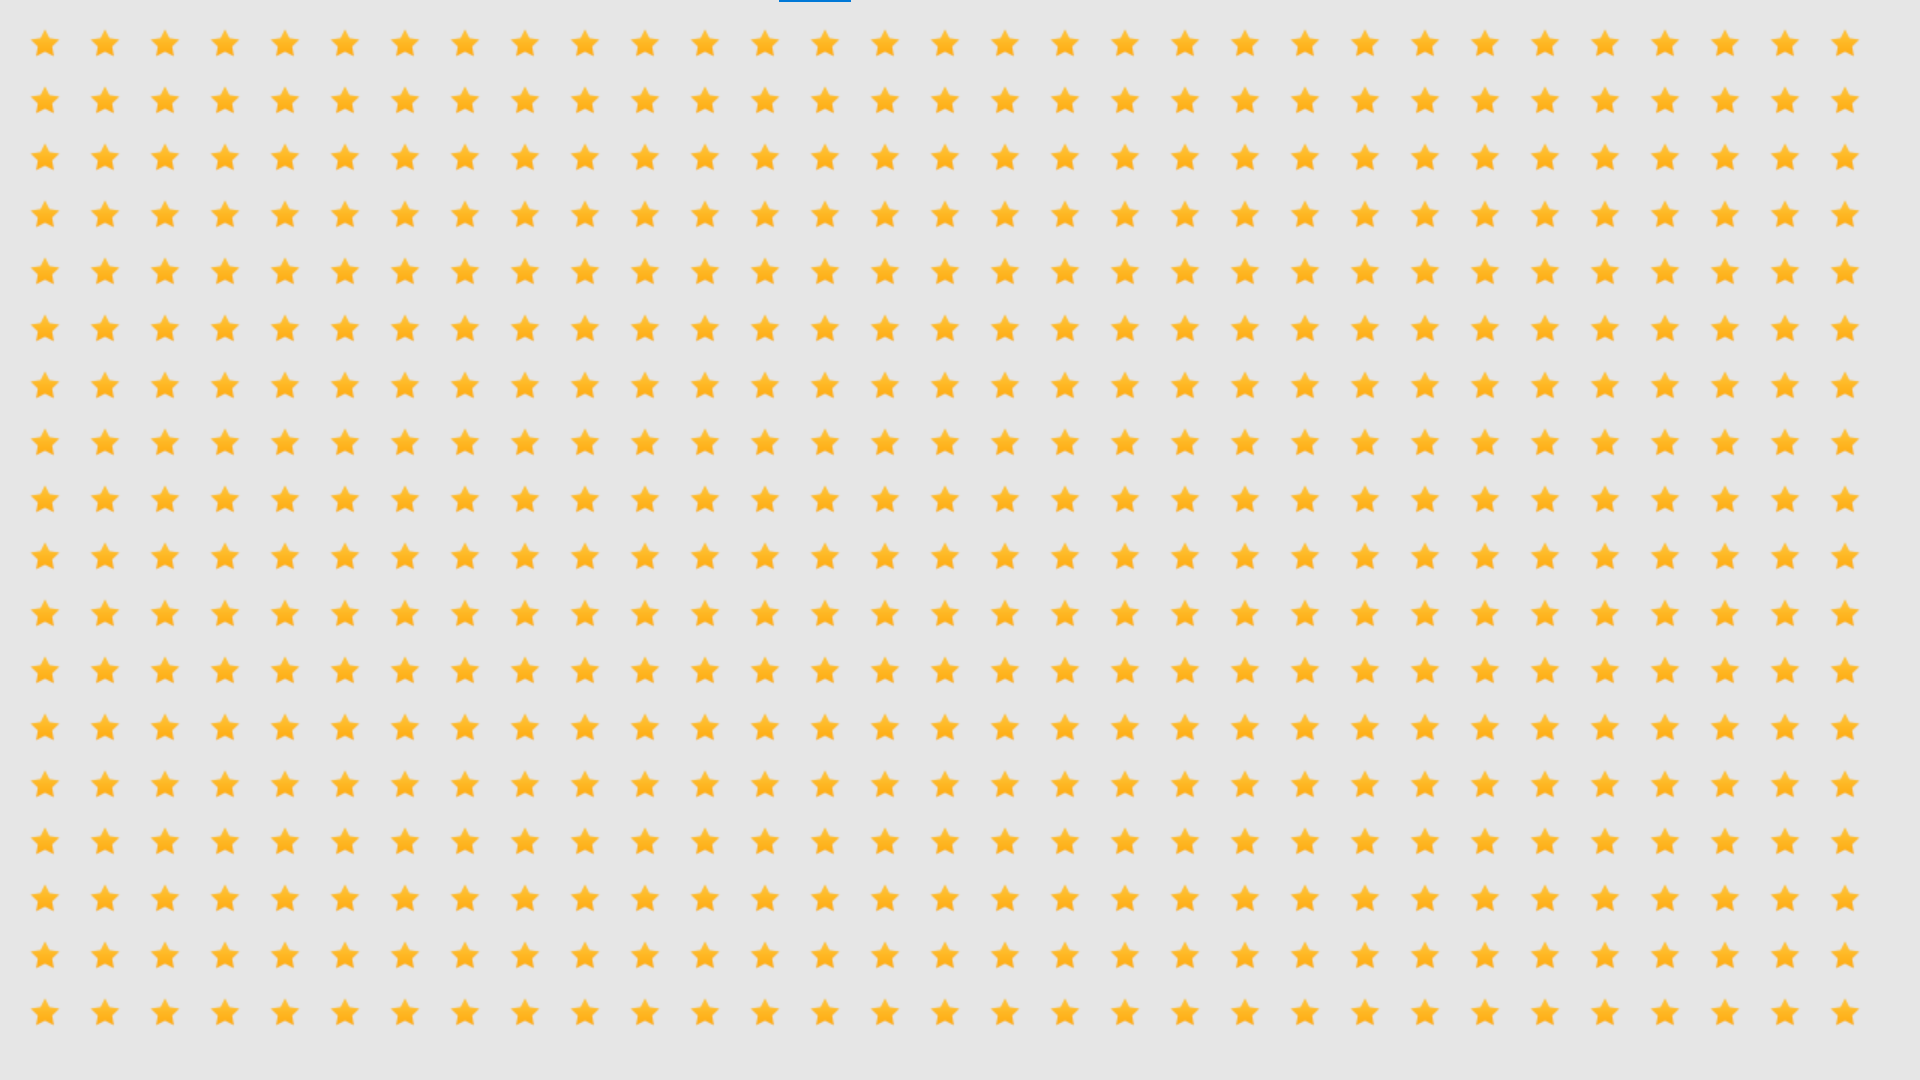

**13-2: Better Stars:** You can make a more realistic star pattern by introducing randomness when you place each star. Recall that you can get a random number like this:

    from random import randint
    random_number = randint(-10,10)
This code returns a random integer between -10 and 10. Using your code from 13-1, adjust each star's position by a random amount.

In [2]:
# code
import pygame
from pygame.sprite import Sprite

class Star(Sprite):
    def __init__(self, ai_game):
        #initialize star and starting position
        super().__init__()
        self.screen = ai_game.screen

        #load star image and set its rect attribute
        self.image = pygame.image.load('images/star.png')
        self.rect = self.image.get_rect()

        #start each new star at top left of screen
        self.rect.x = self.rect.width
        self.rect.y = self.rect.height

        #store star's decimal horizontal position
        self.x = float(self.rect.x)

import sys
import pygame

from settings import Settings
from star import Star
from random import randint

class StarGrid:

    def __init__(self):
        pygame.init()
        self.settings = Settings()
        self.screen = pygame.display.set_mode((0,0), pygame.FULLSCREEN)
        self.settings.screen_width = self.screen.get_rect().width
        self.settings.screen_height = self.screen.get_rect().height

        pygame.display.set_caption("Star Grid")

        self.stars = pygame.sprite.Group()

        self._create_fleet()

    def run_game(self):
        while True:
            self._update_screen()
            self._check_events()

    def _check_events(self):
        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_q:
                    sys.exit()

    def _create_fleet(self):
        #make star
        star = Star(self)
        star_width, star_height = star.rect.size
        #available space in x is width of screen minus the blank margins on either edge which is the width of one star
        available_space_x = self.settings.screen_width - (2*star_width)
        #each star has its own width plus the blank space to its right which is also the width of a star
        #number of stars that will fit in the width of the screen
        number_stars_x = available_space_x // (2*star_width)

        #find number of rows of stars that fit on screen
        available_space_y = self.settings.screen_height  #subtract one star???
        number_rows = available_space_y // (2*star_height)

        for row_number in range(number_rows):
            for star_number in range(number_stars_x):
                self._create_star(star_number, row_number)

    def _create_star(self, star_number, row_number):
        #create row of stars
        star = Star(self)
        star_width, star_height = star.rect.size
        #x and y position of star
        random_number1 = randint(-10, 10)
        star.rect.x = star_width + 2*star_width*star_number + random_number1
        random_number2 = randint(-10, 10)
        star.rect.y = star_height + 2*star_height*row_number + random_number2
        self.stars.add(star)

    def _update_screen(self):
        # redraw screen during each pass through the loop
        self.screen.fill(self.settings.bg_color)

        self.stars.draw(self.screen)
        # make most recently drawn screen visible
        pygame.display.flip()

if __name__=='__main__':
    #make a game instance from class AlienInvasion and run game
    ai = StarGrid()
    ai.run_game()

screen shot
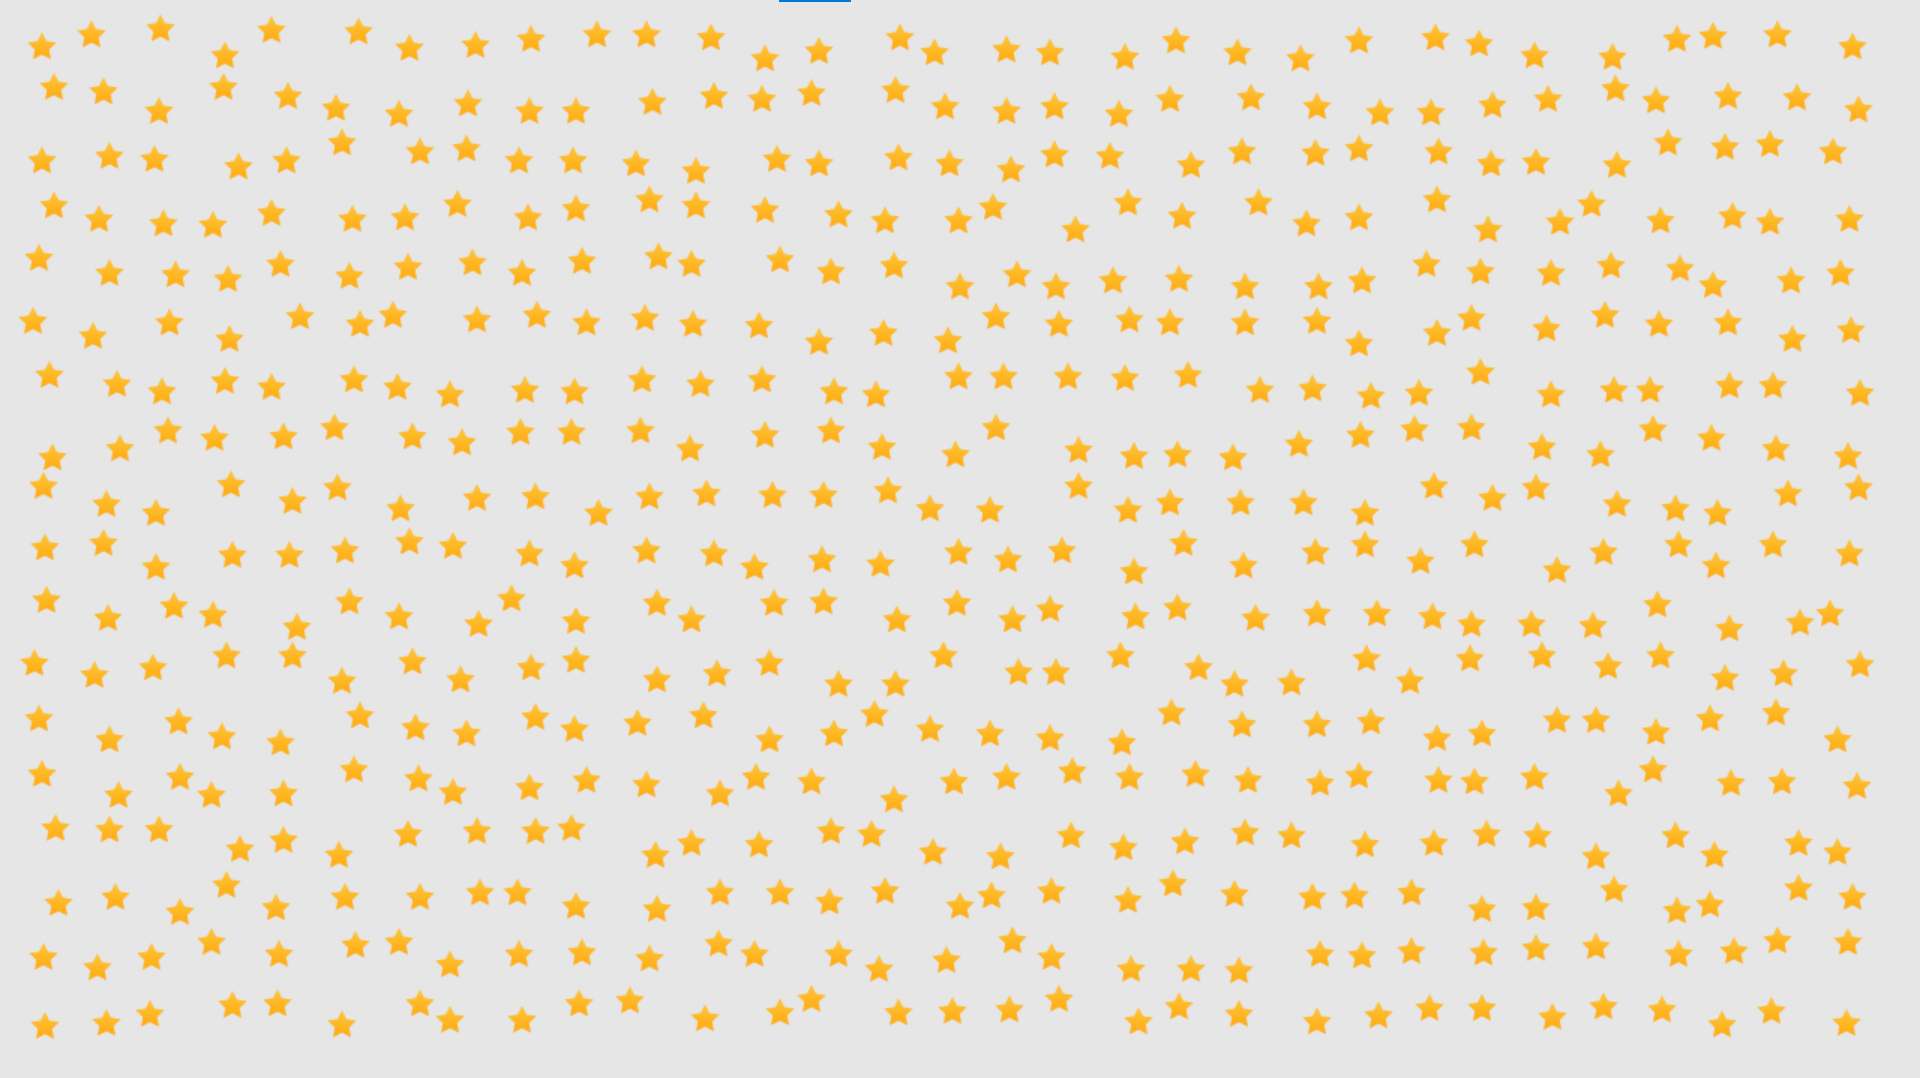

**13-3. Raindrops:** Find an image of a raindrop and create a grid of raindrops. Make the raindrops fall toward the bottom of the screen until they dissappear.

In [2]:
# code
import pygame
from pygame.sprite import Sprite

class Raindrop(Sprite):
    def __init__(self, ai_game):
        #initialize alien and starting position
        super().__init__()
        self.screen = ai_game.screen
        self.settings = ai_game.settings

        #load alien image and set its rect attribute
        self.image = pygame.image.load('images/ghost.png')
        self.rect = self.image.get_rect()

        #start each new alien at top left of screen
        self.rect.x = self.rect.width
        self.rect.y = self.rect.height

        #store alien's decimal horizontal position
        self.x = float(self.rect.x)

    def check_edges(self):
        #return true if alien at edge of screen
        screen_rect = self.screen.get_rect()
        if self.rect.right >= screen_rect.right or self.rect.left <= 0:
            return True

    def update(self):
        #move alien right
        self.y += self.settings.raindrop_speed
        self.rect.y = self.y
        

import sys
import pygame

from settings import Settings
from raindrop import Raindrop

class RainGame:

    def __init__(self):
        pygame.init()
        self.settings = Settings()
        self.screen = pygame.display.set_mode((0,0), pygame.FULLSCREEN)
        self.settings.screen_width = self.screen.get_rect().width
        self.settings.screen_height = self.screen.get_rect().height

        pygame.display.set_caption("Falling Rain")

        self.raindrops = pygame.sprite.Group()

        self._create_fleet()

    def run_game(self):
        while True:
            self._check_events()
            self._update_raindrops()
            self._update_screen()

    def _check_events(self):
        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_q:
                    sys.exit()

    def _create_fleet(self):
        #make alien
        raindrop = Raindrop(self)
        raindrop_width, raindrop_height = raindrop.rect.size
        #available space in x is width of screen minus the blank margins on either edge which is the width of one alien
        available_space_x = self.settings.screen_width - (2*raindrop_width)
        #each alien has its own width plus the blank space to its right which is also the width of an alien
        #number of aliens that will fit in the width of the screen
        number_raindrops_x = available_space_x // (2*raindrop_width)

        available_space_y = self.settings.screen_height
        number_rows = available_space_y // (2*raindrop_height)

        for row_number in range(number_rows):
            for raindrop_number in range(number_raindrops_x):
                self._create_raindrop(raindrop_number, row_number)

    def _create_raindrop(self, raindrop_number, row_number):
        #create row of aliens
        raindrop = Raindrop(self)
        raindrop_width, raindrop_height = raindrop.rect.size
        #x and y position of alien
        raindrop.x = raindrop_width + 2*raindrop_width*raindrop_number
        raindrop.rect.x = raindrop.x
        raindrop.y = raindrop_height + 2*raindrop_height*row_number
        raindrop.rect.y = raindrop.y
        self.raindrops.add(raindrop)

    def _update_raindrops(self):
        #if fleet at edge, update positions of all aliens in the fleet
        self.raindrops.update()

    def _update_screen(self):
        # redraw screen during each pass through the loop
        self.screen.fill(self.settings.bg_color)

        self.raindrops.draw(self.screen)
        # make most recently drawn screen visible
        pygame.display.flip()

if __name__=='__main__':
    #make a game instance from class AlienInvasion and run game
    ai = RainGame()
    ai.run_game()



screen shot
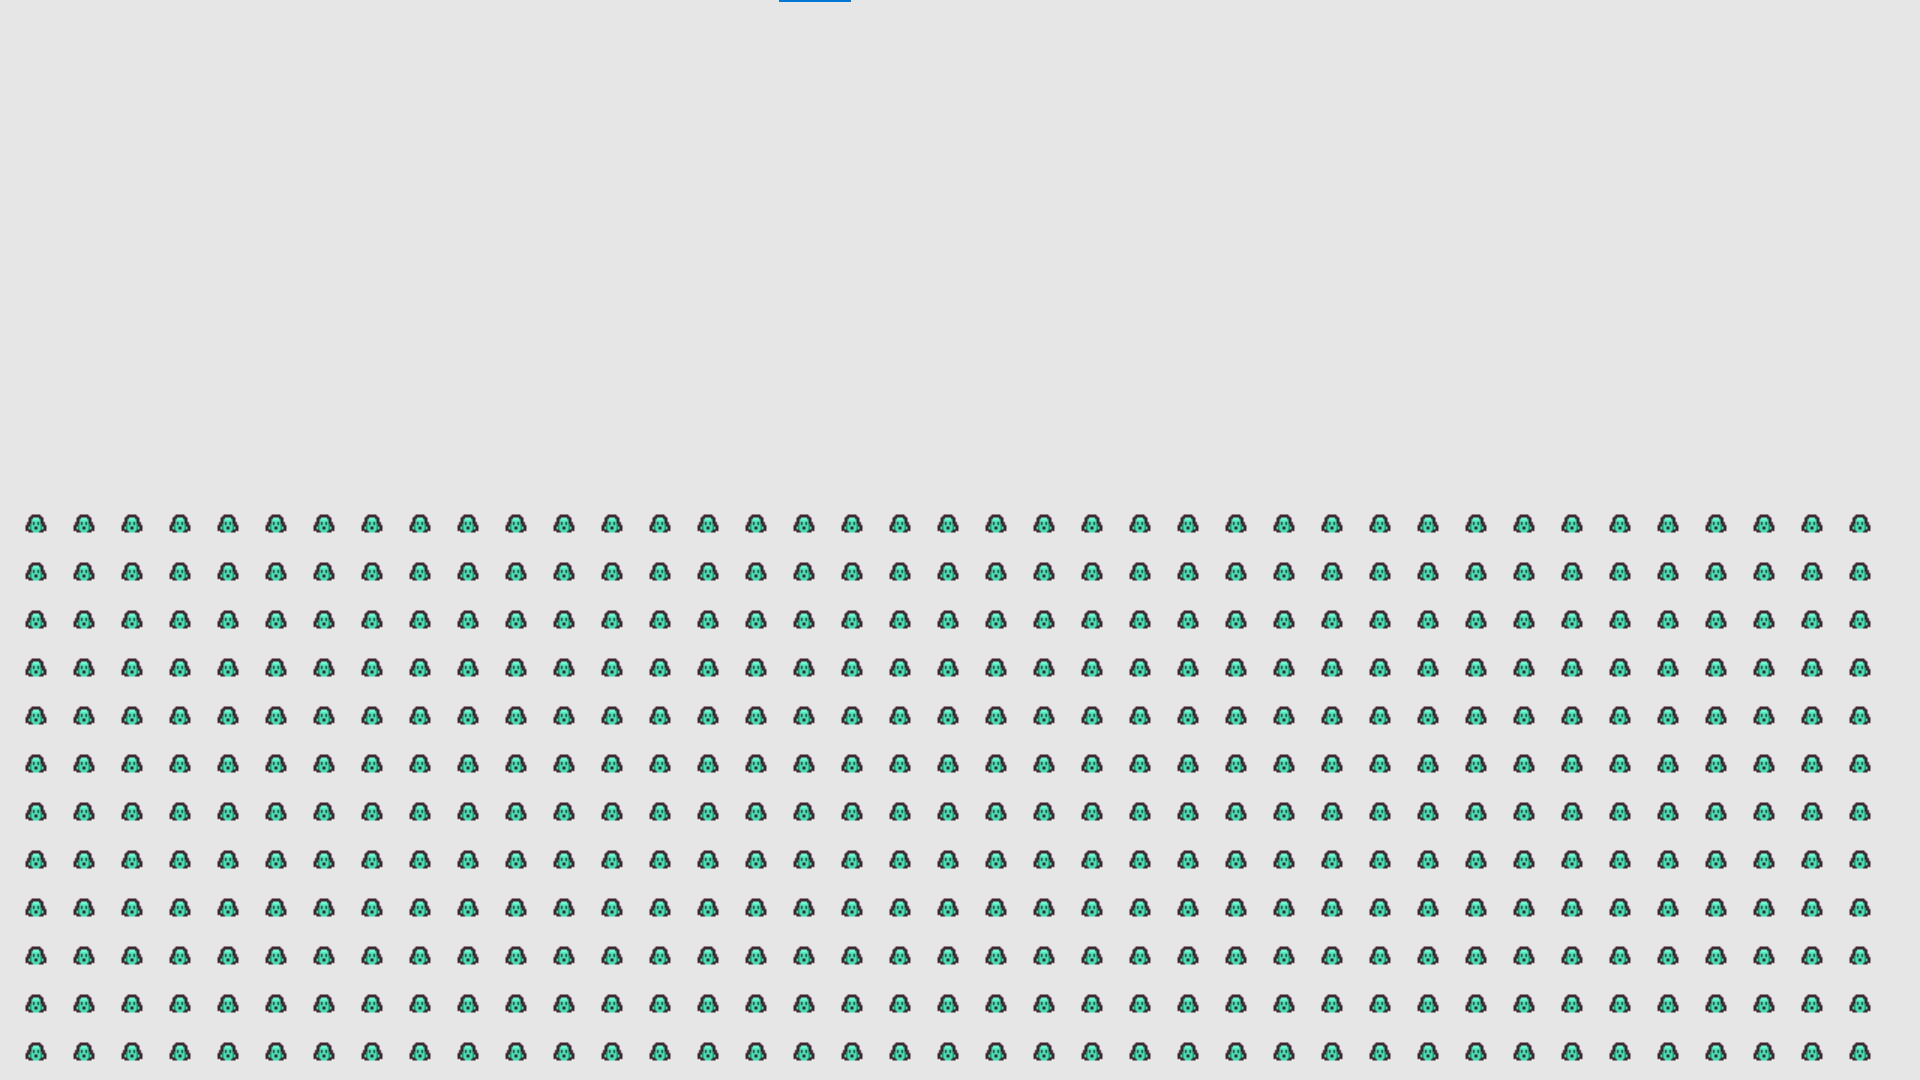

**13-4. Steady Rain:** Modify the code from 13-3 so when a row of rain drops disappears off the bottom of the screen, a new row appears at the top of the screen and begins to fall. 

In [2]:
# code
import pygame
from pygame.sprite import Sprite

class Raindrop(Sprite):
    def __init__(self, ai_game):
        #initialize alien and starting position
        super().__init__()
        self.screen = ai_game.screen
        self.settings = ai_game.settings

        #load alien image and set its rect attribute
        self.image = pygame.image.load('images/ghost.png')
        self.rect = self.image.get_rect()

        #start each new alien at top left of screen
        self.rect.x = self.rect.width
        self.rect.y = self.rect.height

        #store alien's decimal horizontal position
        self.x = float(self.rect.x)
        self.y = float(self.rect.y)

    def is_gone(self):
        if self.rect.top > self.screen.get_rect().bottom:
            return True
        else:
            return False

    def update(self):
        #move alien right
        self.y += self.settings.raindrop_speed
        self.rect.y = self.y

import sys
import pygame

from settings import Settings
from raindrop import Raindrop

class RainGame:

    def __init__(self):
        pygame.init()
        self.settings = Settings()
        self.screen = pygame.display.set_mode((0,0), pygame.FULLSCREEN)
        self.settings.screen_width = self.screen.get_rect().width
        self.settings.screen_height = self.screen.get_rect().height

        pygame.display.set_caption("Falling Rain")

        self.raindrops = pygame.sprite.Group()

        self._create_fleet()

    def run_game(self):
        while True:
            self._check_events()
            self._update_raindrops()
            self._update_screen()

    def _check_events(self):
        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_q:
                    sys.exit()

    def _create_fleet(self):
        #make alien
        raindrop = Raindrop(self)
        raindrop_width, raindrop_height = raindrop.rect.size
        #available space in x is width of screen minus the blank margins on either edge which is the width of one alien
        available_space_x = self.settings.screen_width - (2*raindrop_width)
        #each alien has its own width plus the blank space to its right which is also the width of an alien
        #number of aliens that will fit in the width of the screen
        self.number_raindrops_x = available_space_x // (2*raindrop_width)

        available_space_y = self.settings.screen_height
        number_rows = available_space_y // (2*raindrop_height)

        for row_number in range(number_rows):
            for raindrop_number in range(self.number_raindrops_x):
                self._create_raindrop(raindrop_number, row_number)

    def _create_raindrop(self, raindrop_number, row_number):
        #create row of aliens
        raindrop = Raindrop(self)
        raindrop_width, raindrop_height = raindrop.rect.size
        #x and y position of alien
        raindrop.x = raindrop_width + 2*raindrop_width*raindrop_number
        raindrop.rect.x = raindrop.x
        raindrop.y = raindrop_height + 2*raindrop_height*row_number
        raindrop.rect.y = raindrop.y
        self.raindrops.add(raindrop)

    def _update_raindrops(self):
        #if fleet at edge, update positions of all aliens in the fleet
        self.raindrops.update()

        make_more_rain = False
        for raindrop in self.raindrops:
            if raindrop.is_gone():
                self.raindrops.remove(raindrop)
                make_more_rain = True

        if make_more_rain:
            for raindrop_number in range(self.number_raindrops_x):
                self._create_raindrop(raindrop_number,0)

    def _update_screen(self):
        # redraw screen during each pass through the loop
        self.screen.fill(self.settings.bg_color)

        self.raindrops.draw(self.screen)
        # make most recently drawn screen visible
        pygame.display.flip()

if __name__=='__main__':
    #make a game instance from class AlienInvasion and run game
    ai = RainGame()
    ai.run_game()

screen shot
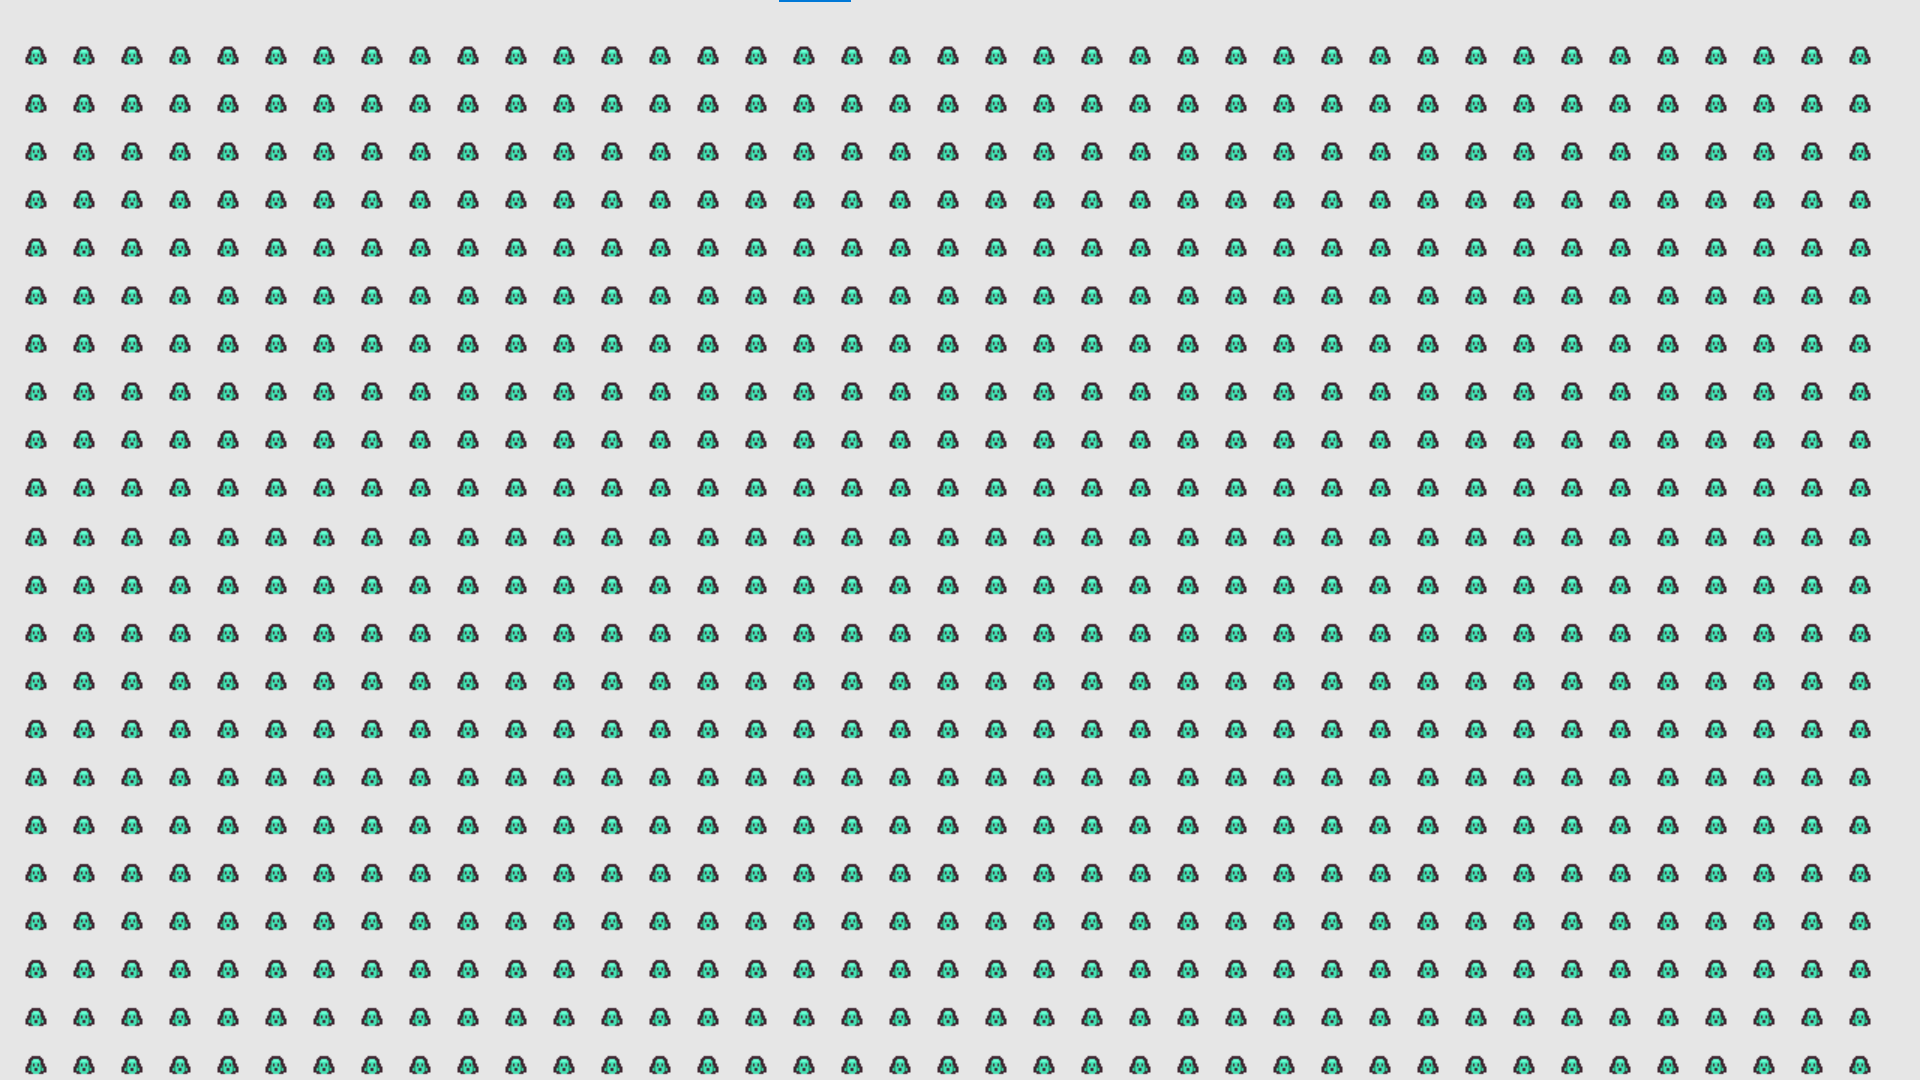

**13-5 Sideways Shooter Part 2:** We've come a long way since Exercise 12-6, Sideways Shooter. For this exercise, try to develop Sideways Shooter to the same point we've brought *Alien Invasion* to. Add a fleet of aliens, and make them move sideways toward the ship. Or, write code that places aliens at random positions along the right side of the screen and then sends them toward the ship. Also, write code that makes the aliens disappear when they're hit.

In [2]:
# code
import sys
import pygame

from settings import Settings
from sship import sShip
from sbullet import sBullet
from salien import sAlien

class SShooter:

    def __init__(self):
        pygame.init()
        self.settings = Settings()
        self.screen = pygame.display.set_mode((0,0), pygame.FULLSCREEN)
        self.settings.screen_width = self.screen.get_rect().width
        self.settings.screen_height = self.screen.get_rect().height

        pygame.display.set_caption("Sideways Shooter")

        self.sship = sShip(self)
        #create group of bullets that will have their positions updated
        self.sbullets = pygame.sprite.Group()
        self.saliens = pygame.sprite.Group()

        self._create_fleet()

    def run_game(self):
        while True:
            self._check_events()
            self.sship.update()
            self._update_bullets()
            self._update_aliens()
            self._update_screen()

    def _check_events(self):
        #respond to key and mouse presses
        #accesses keydown and keyup methods as its helper methods so this method is cleaner
        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                self._check_keydown_events(event)
            elif event.type == pygame.KEYUP:
                self._check_keyup_events(event)

    def _check_keydown_events(self, event):
        if event.key == pygame.K_q:
            sys.exit()

        elif event.key == pygame.K_UP:
            self.sship.moving_up = True
        elif event.key == pygame.K_DOWN:
            self.sship.moving_down = True

        elif event.key == pygame.K_SPACE:
            self._fire_bullet()

    def _check_keyup_events(self, event):
        if event.key == pygame.K_UP:
            self.sship.moving_up = False
        elif event.key == pygame.K_DOWN:
            self.sship.moving_down = False

    def _fire_bullet(self):
        #create new bullet and add to bullets group
        if len(self.sbullets) < self.settings.bullets_allowed:
            new_bullet = sBullet(self)
            self.sbullets.add(new_bullet)

    def _update_bullets(self):
        #update position of bullets
        self.sbullets.update()

        # get rid of bullets that have disappeared
        for bullet in self.sbullets.copy():
            if bullet.rect.right >= self.settings.screen_width:
                self.sbullets.remove(bullet)
        self._check_bullet_alien_collisions()
    def _check_bullet_alien_collisions(self):
        #check if bullet hit alien, if so, delete that bullet and alien
        collisions = pygame.sprite.groupcollide(self.sbullets, self.saliens, True, True)

        #checks if fleet has been destroyed then repopulates it
        if not self.saliens:
            #destroy existing bullets and create new fleet
            self.sbullets.empty()
            self._create_fleet()
    def _create_fleet(self):
        #make alien
        salien = sAlien(self)
        alien_width, alien_height = salien.rect.size
        ship_width = self.sship.rect.width
        #available space in x is width of screen minus the blank margins on either edge which is the width of one alien
        available_space_x = (self.settings.screen_width - alien_width - ship_width)
        #each alien has its own width plus the blank space to its right which is also the width of an alien
        #number of aliens that will fit in the width of the screen
        number_aliens_x = available_space_x // (2*alien_width)

        #find number of rows of aliens that fit on screen
        #put space between ship and first row of aliens equal to height of 3 aliens
        available_space_y = self.settings.screen_height - (2*alien_height)
        number_rows = available_space_y // (2*alien_height)


        for alien_number in range(number_aliens_x):
            for row_number in range(number_rows):
                self._create_alien(alien_number, row_number)

    def _create_alien(self, alien_number, row_number):
        #create row of aliens
        salien = sAlien(self)
        alien_width, alien_height = salien.rect.size
        ship_width = self.sship.rect.width
        #x and y position of alien
        salien.x = self.settings.screen_width - 2*alien_width - 2*alien_width*alien_number
        salien.rect.x = salien.x
        salien.y = alien_height + 2*alien_height*row_number
        salien.rect.y = salien.y
        self.saliens.add(salien)
    def _update_aliens(self):
        #if fleet at edge, update positions of all aliens in the fleet
        self._check_fleet_edges()
        self.saliens.update()
    def _check_fleet_edges(self):
        #respond if alien reaches edge
        for salien in self.saliens.sprites():
            if salien.check_edges():
                self._change_fleet_direction()
                break
    def _change_fleet_direction(self):
        #drop entire fleet and change fleet's direction
        for salien in self.saliens.sprites():
            salien.rect.x -= self.settings.fleet_drop_speed
        self.settings.fleet_direction *= -1
    def _update_screen(self):
        # redraw screen during each pass through the loop
        self.screen.fill(self.settings.bg_color)

        self.sship.blitme()

        for sbullet in self.sbullets.sprites():
            sbullet.draw_bullet()

        self.saliens.draw(self.screen)
        # make most recently drawn screen visible
        pygame.display.flip()

if __name__=='__main__':
    #make a game instance from class AlienInvasion and run game
    ai = SShooter()
    ai.run_game()

screen shot
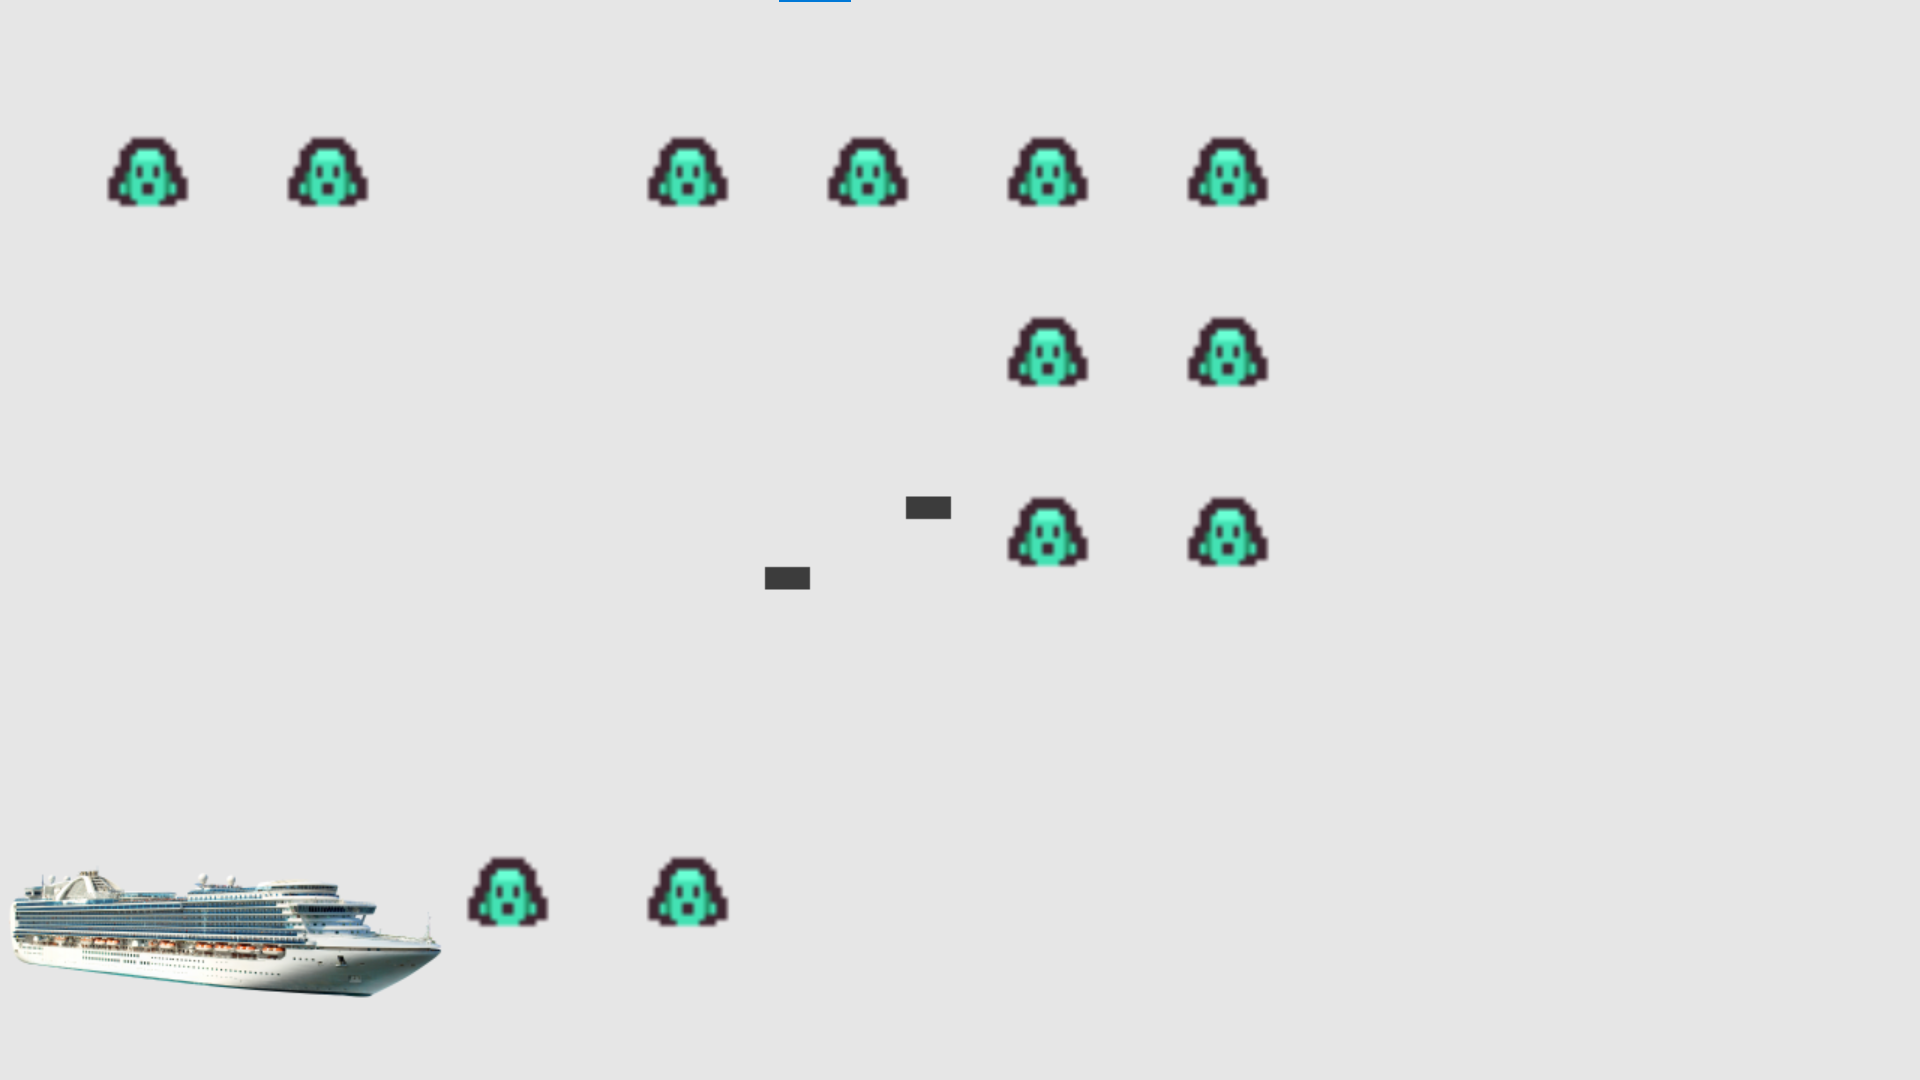

**13-6. Game Over:** In Sideways Shooter, keep track of the number of times the ship is hit and the number of times an alien is hit by the ship. Decide on an appropriate condition for ending the game, and stop the game when this situation occurs. 

In [2]:
# code
import sys
from time import sleep
import pygame

from settings import Settings
from game_stats import GameStats
from sship import sShip
from sbullet import sBullet
from salien import sAlien

class SShooter:

    def __init__(self):
        pygame.init()
        self.settings = Settings()
        self.screen = pygame.display.set_mode((0,0), pygame.FULLSCREEN)
        self.settings.screen_width = self.screen.get_rect().width
        self.settings.screen_height = self.screen.get_rect().height

        pygame.display.set_caption("Sideways Shooter")

        self.stats = GameStats(self)
        self.sship = sShip(self)
        #create group of bullets that will have their positions updated
        self.sbullets = pygame.sprite.Group()
        self.saliens = pygame.sprite.Group()

        self._create_fleet()

    def run_game(self):
        while True:
            self._check_events()
            if self.stats.game_active:
                self.sship.update()
                self._update_bullets()
                self._update_aliens()
            self._update_screen()

    def _check_events(self):
        #respond to key and mouse presses
        #accesses keydown and keyup methods as its helper methods so this method is cleaner
        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                self._check_keydown_events(event)
            elif event.type == pygame.KEYUP:
                self._check_keyup_events(event)

    def _check_keydown_events(self, event):
        if event.key == pygame.K_q:
            sys.exit()

        elif event.key == pygame.K_UP:
            self.sship.moving_up = True
        elif event.key == pygame.K_DOWN:
            self.sship.moving_down = True

        elif event.key == pygame.K_SPACE:
            self._fire_bullet()

    def _check_keyup_events(self, event):
        if event.key == pygame.K_UP:
            self.sship.moving_up = False
        elif event.key == pygame.K_DOWN:
            self.sship.moving_down = False

    def _fire_bullet(self):
        #create new bullet and add to bullets group
        if len(self.sbullets) < self.settings.bullets_allowed:
            new_bullet = sBullet(self)
            self.sbullets.add(new_bullet)

    def _update_bullets(self):
        #update position of bullets
        self.sbullets.update()

        # get rid of bullets that have disappeared
        for bullet in self.sbullets.copy():
            if bullet.rect.right >= self.settings.screen_width:
                self.sbullets.remove(bullet)
        self._check_bullet_alien_collisions()
    def _check_bullet_alien_collisions(self):
        #check if bullet hit alien, if so, delete that bullet and alien
        collisions = pygame.sprite.groupcollide(self.sbullets, self.saliens, True, True)

        #checks if fleet has been destroyed then repopulates it
        if not self.saliens:
            #destroy existing bullets and create new fleet
            self.sbullets.empty()
            self._create_fleet()
    def _create_fleet(self):
        #make alien
        salien = sAlien(self)
        alien_width, alien_height = salien.rect.size
        ship_width = self.sship.rect.width
        #available space in x is width of screen minus the blank margins on either edge which is the width of one alien
        available_space_x = (self.settings.screen_width - alien_width - ship_width)
        #each alien has its own width plus the blank space to its right which is also the width of an alien
        #number of aliens that will fit in the width of the screen
        number_aliens_x = available_space_x // (2*alien_width)

        #find number of rows of aliens that fit on screen
        #put space between ship and first row of aliens equal to height of 3 aliens
        available_space_y = self.settings.screen_height - (2*alien_height)
        number_rows = available_space_y // (2*alien_height)


        for alien_number in range(number_aliens_x):
            for row_number in range(number_rows):
                self._create_alien(alien_number, row_number)

    def _create_alien(self, alien_number, row_number):
        #create row of aliens
        salien = sAlien(self)
        alien_width, alien_height = salien.rect.size
        ship_width = self.sship.rect.width
        #x and y position of alien
        salien.x = self.settings.screen_width - 2*alien_width - 2*alien_width*alien_number
        salien.rect.x = salien.x
        salien.y = alien_height + 2*alien_height*row_number
        salien.rect.y = salien.y
        self.saliens.add(salien)
    def _update_aliens(self):
        #if fleet at edge, update positions of all aliens in the fleet
        self._check_fleet_edges()
        self.saliens.update()

        if pygame.sprite.spritecollideany(self.sship, self.saliens):
            self._ship_hit()

        #look for aliens hitting left of screen
        self._check_aliens_leftside()

    def _ship_hit(self):
        #respond to ship being hit by alien
        #decrement ships left
        if self.stats.ships_left > 0:
            self.stats.ships_left -= 1

            #get rid of remaining aliens and bullets
            self.saliens.empty()
            self.sbullets.empty()

            #create new fleet and center ship
            self._create_fleet()
            self.sship.center_ship()

            #pause
            sleep(.5)
        else:
            self.stats.game_active = False
    def _check_aliens_leftside(self):
        #check if any aliens have reached bottom of screen
        screen_rect = self.screen.get_rect()
        for alien in self.saliens.sprites():
            if alien.rect.left <= 0:
                #treat this the same as if ship got hit
                self._ship_hit()
                break

    def _check_fleet_edges(self):
        #respond if alien reaches edge
        for salien in self.saliens.sprites():
            if salien.check_edges():
                self._change_fleet_direction()
                break
    def _change_fleet_direction(self):
        #drop entire fleet and change fleet's direction
        for salien in self.saliens.sprites():
            salien.rect.x -= self.settings.fleet_drop_speed
        self.settings.fleet_direction *= -1
    def _update_screen(self):
        # redraw screen during each pass through the loop
        self.screen.fill(self.settings.bg_color)

        self.sship.blitme()

        for sbullet in self.sbullets.sprites():
            sbullet.draw_bullet()

        self.saliens.draw(self.screen)
        # make most recently drawn screen visible
        pygame.display.flip()

if __name__=='__main__':
    #make a game instance from class AlienInvasion and run game
    ai = SShooter()
    ai.run_game()

screen shot

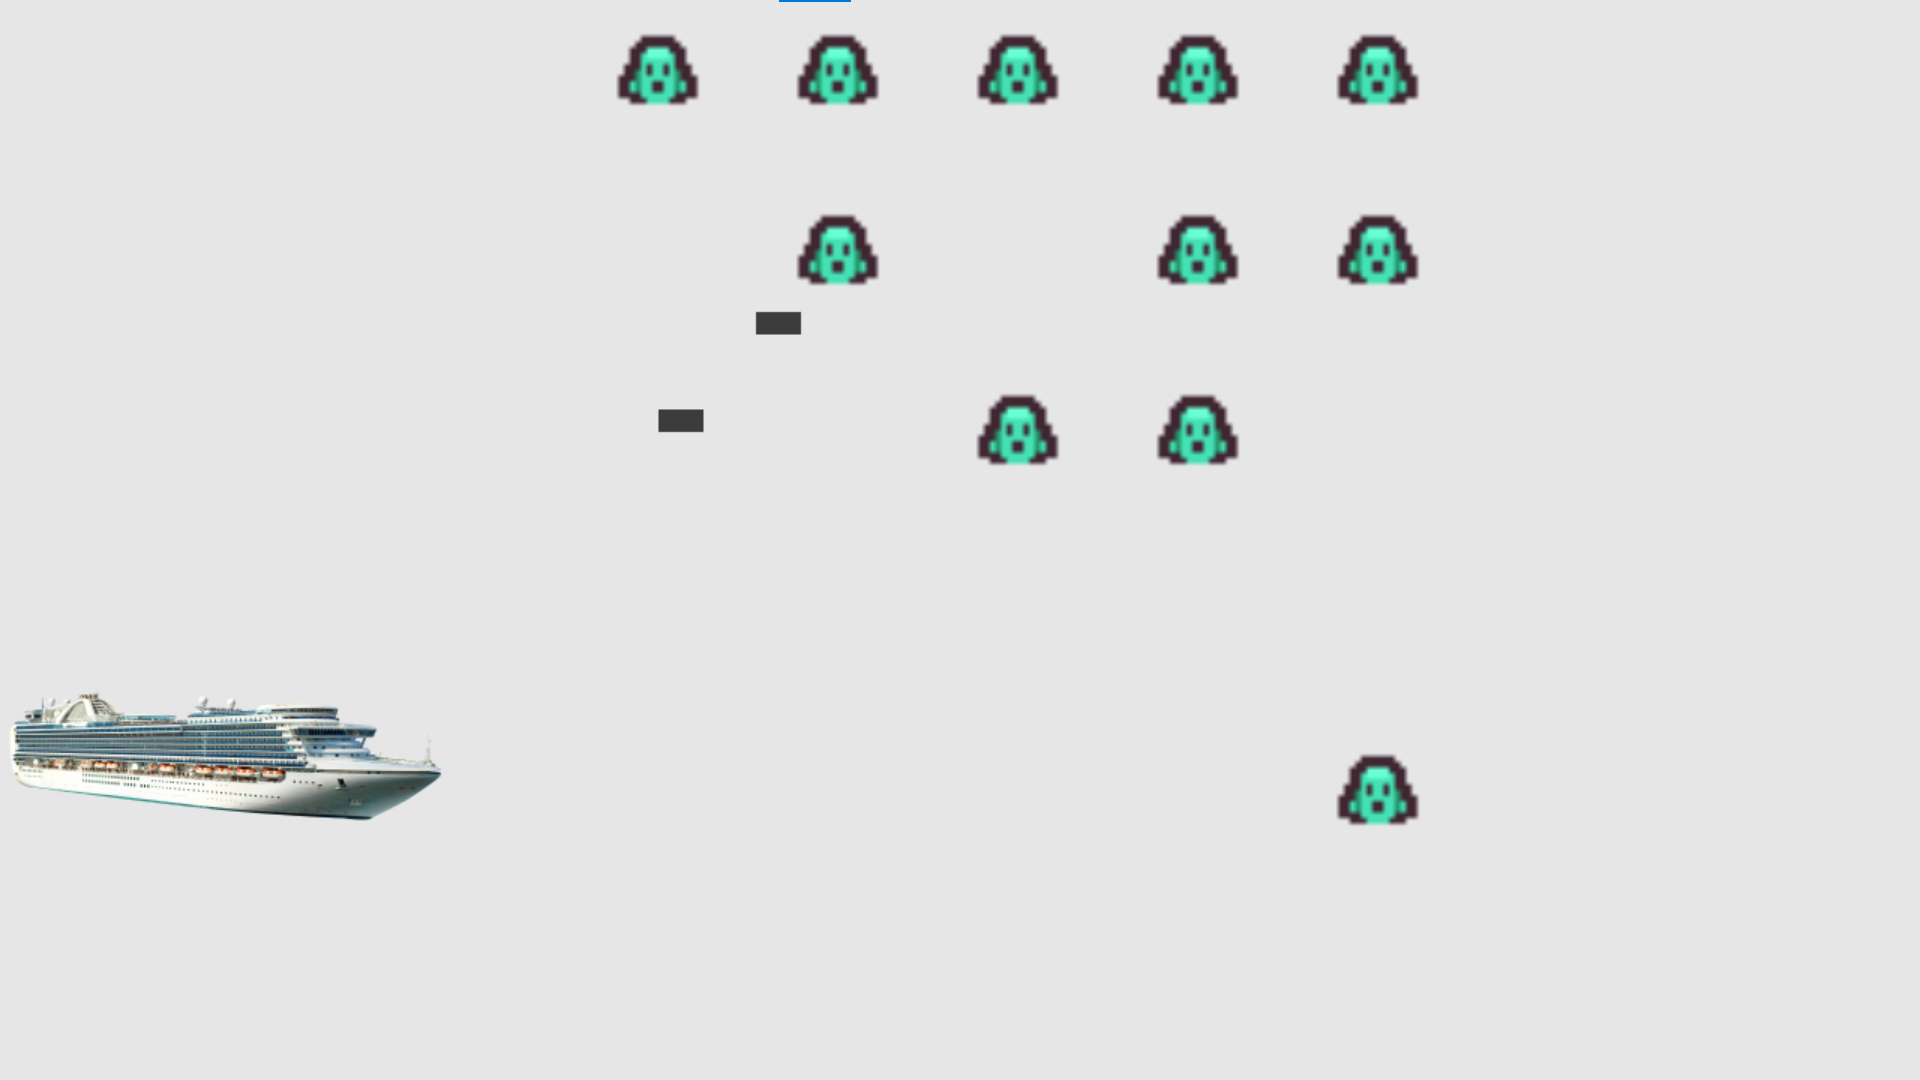